# Install the library

In [ ]:
pip install yfinance

In [ ]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 996.2 kB/s eta 0:00:00


# Data Preprocessing:

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from pypfopt.discrete_allocation import DiscreteAllocation
from scipy.cluster.hierarchy import dendrogram, linkage

# Define a list of stock symbols

In [ ]:
symbols = ['RELIANCE.NS','HDFCBANK.NS','ICICIBANK.NS','INFY.NS','ITC.NS','TCS.NS','KOTAKBANK.NS','LT.NS','AXISBANK.NS','ADANIPORTS.NS','ASIANPAINT.NS','BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS','BHARTIARTL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DIVISLAB.NS','DRREDDY.NS','EICHERMOT.NS','GRASIM.NS','HCLTECH.NS','HEROMOTOCO.NS','HINDALCO.NS','HINDUNILVR.NS','IOC.NS','INDUSINDBK.NS','JSWSTEEL.NS','M&M.NS','MARUTI.NS','NTPC.NS','NESTLEIND.NS','ONGC.NS','POWERGRID.NS','SHREECEM.NS','SBIN.NS','SUNPHARMA.NS','TATAMOTORS.NS','TATASTEEL.NS','TECHM.NS','TITAN.NS','ULTRACEMCO.NS','UPL.NS','WIPRO.NS','ADANIGREEN.NS','ADANIENT.NS','HINDPETRO.NS','BPCL.NS']

# Download stock data using Yahoo Finance API

In [ ]:
num_companies = len(symbols)
weight= 1 / num_companies
weight= np.full(num_companies,weight)
for i, company in enumerate(symbols):
    print(f"{company}: {weight[i]:.4f}")

RELIANCE.NS: 0.0204
HDFCBANK.NS: 0.0204
ICICIBANK.NS: 0.0204
INFY.NS: 0.0204
ITC.NS: 0.0204
TCS.NS: 0.0204
KOTAKBANK.NS: 0.0204
LT.NS: 0.0204
AXISBANK.NS: 0.0204
ADANIPORTS.NS: 0.0204
ASIANPAINT.NS: 0.0204
BAJAJ-AUTO.NS: 0.0204
BAJFINANCE.NS: 0.0204
BAJAJFINSV.NS: 0.0204
BHARTIARTL.NS: 0.0204
BRITANNIA.NS: 0.0204
CIPLA.NS: 0.0204
COALINDIA.NS: 0.0204
DIVISLAB.NS: 0.0204
DRREDDY.NS: 0.0204
EICHERMOT.NS: 0.0204
GRASIM.NS: 0.0204
HCLTECH.NS: 0.0204
HEROMOTOCO.NS: 0.0204
HINDALCO.NS: 0.0204
HINDUNILVR.NS: 0.0204
IOC.NS: 0.0204
INDUSINDBK.NS: 0.0204
JSWSTEEL.NS: 0.0204
M&M.NS: 0.0204
MARUTI.NS: 0.0204
NTPC.NS: 0.0204
NESTLEIND.NS: 0.0204
ONGC.NS: 0.0204
POWERGRID.NS: 0.0204
SHREECEM.NS: 0.0204
SBIN.NS: 0.0204
SUNPHARMA.NS: 0.0204
TATAMOTORS.NS: 0.0204
TATASTEEL.NS: 0.0204
TECHM.NS: 0.0204
TITAN.NS: 0.0204
ULTRACEMCO.NS: 0.0204
UPL.NS: 0.0204
WIPRO.NS: 0.0204
ADANIGREEN.NS: 0.0204
ADANIENT.NS: 0.0204
HINDPETRO.NS: 0.0204
BPCL.NS: 0.0204


# Define the start and end dates for data retrieval

In [ ]:
start_date = '2022-01-01'
end_date =  datetime.today().strftime('%Y-%m-%d')

AttributeError: ignored

# Determine each stock's ideal weight

In [ ]:
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

[*********************100%***********************]  49 of 49 completed


In [ ]:
data

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1714.705200,1346.900024,726.647156,3375.408936,693.864136,2969.873047,1695.735596,7132.051270,688.240906,374.373993,...,27029.671875,830.353699,496.053955,49.178516,3654.321533,1641.654907,2498.302002,7644.874023,741.506104,709.859253
2022-01-04,1716.552368,1366.699951,729.261414,3411.802490,706.618530,2980.792969,1711.129028,7253.954590,694.363708,374.228516,...,26738.712891,819.350159,488.078827,49.451855,3718.453369,1646.254028,2556.853027,7572.076172,739.128845,712.624756
2022-01-05,1713.007568,1399.650024,744.699951,3478.375977,724.305176,3043.687012,1796.303589,7577.779297,696.902405,382.712769,...,26997.183594,816.807129,488.228333,50.691601,3695.671875,1598.194458,2550.072266,7581.181641,741.797119,704.723145
2022-01-06,1710.660889,1409.800049,729.803955,3466.392578,727.692932,3097.744629,1796.114014,7654.290039,707.256409,383.779358,...,26316.070312,811.427551,487.331146,50.073879,3644.462402,1556.389771,2569.622314,7382.238281,759.505249,697.068542
2022-01-07,1696.680786,1423.099976,726.153931,3527.196045,727.991882,3074.454102,1773.186279,7566.468750,701.581665,384.167236,...,26830.128906,810.791870,489.075714,49.949043,3688.541260,1567.197388,2546.657471,7480.622070,765.521057,702.747742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,2492.199951,1093.300049,777.849976,3377.350098,953.900024,4931.399902,1598.300049,7300.299805,889.900024,377.500000,...,24108.400391,1143.400024,644.299988,123.150002,3421.449951,1115.500000,3004.050049,8318.150391,614.610352,405.049988
2023-08-01,2481.100098,1087.050049,765.349976,3342.949951,959.900024,4923.950195,1572.349976,7269.700195,891.650024,377.500000,...,24102.050781,1143.449951,643.650024,123.199997,3452.050049,1143.500000,3001.899902,8281.799805,615.594238,406.950012
2023-08-02,2473.550049,1052.449951,761.450012,3362.899902,945.250000,4832.100098,1527.000000,7203.450195,878.099976,369.100006,...,24045.099609,1135.250000,622.650024,118.949997,3440.649902,1145.650024,2977.149902,8287.700195,609.150024,402.799988


# Check for missing values in the data

In [ ]:
data.isnull().sum()

ADANIENT.NS      0
ADANIGREEN.NS    0
ADANIPORTS.NS    0
ASIANPAINT.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJAJFINSV.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
BPCL.NS          0
BRITANNIA.NS     0
CIPLA.NS         0
COALINDIA.NS     0
DIVISLAB.NS      0
DRREDDY.NS       0
EICHERMOT.NS     0
GRASIM.NS        0
HCLTECH.NS       0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
HINDPETRO.NS     0
HINDUNILVR.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFY.NS          0
IOC.NS           0
ITC.NS           0
JSWSTEEL.NS      0
KOTAKBANK.NS     0
LT.NS            0
M&M.NS           0
MARUTI.NS        0
NESTLEIND.NS     0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SHREECEM.NS      1
SUNPHARMA.NS     0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
TITAN.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
WIPRO.NS         0
dtype: int64

# Generate descriptive statistics for the 'Adj Close' data

In [ ]:
data.describe()

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,389.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,2516.434408,1706.912820,746.729419,3068.472950,813.515992,3632.703112,1494.877037,6608.198831,760.215810,341.121667,...,23388.400832,932.501899,455.836809,88.881713,3273.527443,1083.423856,2508.834428,6886.369782,714.735906,441.222383
std,774.457528,613.647793,87.683363,232.067640,100.648214,446.947157,178.745821,644.116129,61.532896,25.164003,...,2033.810757,75.265183,58.003093,24.769691,195.712713,163.512692,243.784814,745.976957,46.383569,79.285972
min,1192.307373,462.200012,459.361847,2559.437744,623.316956,2931.402588,1092.026855,5219.824219,638.063965,290.931702,...,17933.236328,782.144104,371.143250,42.700008,2886.271240,887.650818,1916.550903,5124.328613,595.426880,356.200012
25%,1851.398102,976.250000,694.130081,2868.940613,728.962845,3357.155151,1342.450989,5973.924194,707.144394,322.081696,...,21843.802734,871.193359,416.115601,56.807970,3147.754517,972.373413,2384.885254,6355.962402,678.818802,391.071472
50%,2281.557251,1909.199951,732.897919,3075.105591,811.779938,3495.574585,1521.860352,6720.929932,763.924988,339.475006,...,23882.761719,937.947845,436.589294,101.584465,3248.496094,1023.295502,2505.848511,6888.491455,714.815369,404.825012
75%,3227.621399,2121.250000,811.134506,3227.929565,900.597229,3782.094421,1633.981995,7139.503784,805.262497,361.675011,...,24791.248047,991.829575,479.904282,106.087494,3396.437866,1115.548340,2625.957947,7391.975464,753.060760,468.807777
max,4161.137207,2970.500000,963.770874,3543.699951,985.422791,4917.700195,1834.469849,7860.450195,895.150024,393.299988,...,27325.240234,1138.550049,641.700012,120.599998,3847.099854,1646.254028,3133.846680,8425.292969,816.025452,712.624756


# Calculate the daily returns based on the 'Adj Close' prices

In [ ]:
returns= data.pct_change()
returns

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.001077,0.014700,0.003598,0.010782,0.018382,0.003677,0.009078,0.017092,0.008896,-0.000388,...,-0.010765,-0.013252,-0.016077,0.005558,0.017550,0.002801,0.023436,-0.009522,-0.003206,0.003896
2022-01-05,-0.002065,0.024109,0.021170,0.019513,0.025030,0.021100,0.049777,0.044641,0.003656,0.022671,...,0.009666,-0.003104,0.000306,0.025070,-0.006127,-0.029193,-0.002652,0.001203,0.003610,-0.011088
2022-01-06,-0.001370,0.007252,-0.020003,-0.003445,0.004678,0.017761,-0.000106,0.010097,0.014857,0.002787,...,-0.025229,-0.006586,-0.001838,-0.012186,-0.013857,-0.026157,0.007666,-0.026242,0.023872,-0.010862
2022-01-07,-0.008172,0.009434,-0.005001,0.017541,0.000411,-0.007519,-0.012765,-0.011474,-0.008024,0.001011,...,0.019534,-0.000783,0.003580,-0.002493,0.012095,0.006944,-0.008937,0.013327,0.007921,0.008147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,0.000786,-0.006429,0.009403,0.007391,0.000206,0.004123,0.015096,-0.000020,0.002427,-0.002816,...,0.006421,0.002962,0.005593,-0.009434,0.007853,-0.027822,0.000974,0.012397,-0.003861,-0.001606
2023-07-25,0.020036,0.099985,0.018972,-0.040438,-0.009264,-0.006922,-0.005219,0.003278,-0.005067,-0.008086,...,0.019142,-0.004862,0.016210,0.032468,0.001296,-0.004605,0.016716,0.021101,-0.009729,-0.009034
2023-07-26,0.001662,0.048114,0.004538,-0.008058,0.014857,0.004434,-0.013585,-0.022783,0.006507,0.002070,...,0.025028,0.015479,0.002580,0.005870,-0.003192,-0.011500,-0.006817,-0.004879,0.009425,0.005869


In [ ]:
returns.dropna(axis=0, inplace=True)
returns

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.001077,0.014700,0.003598,0.010782,0.018382,0.003677,0.009078,0.017092,0.008896,-0.000388,...,-0.010765,-0.013252,-0.016077,0.005558,0.017550,0.002801,0.023436,-0.009522,-0.003206,0.003896
2022-01-05,-0.002065,0.024109,0.021170,0.019513,0.025030,0.021100,0.049777,0.044641,0.003656,0.022671,...,0.009666,-0.003104,0.000306,0.025070,-0.006127,-0.029193,-0.002652,0.001203,0.003610,-0.011088
2022-01-06,-0.001370,0.007252,-0.020003,-0.003445,0.004678,0.017761,-0.000106,0.010097,0.014857,0.002787,...,-0.025229,-0.006586,-0.001838,-0.012186,-0.013857,-0.026157,0.007666,-0.026242,0.023872,-0.010862
2022-01-07,-0.008172,0.009434,-0.005001,0.017541,0.000411,-0.007519,-0.012765,-0.011474,-0.008024,0.001011,...,0.019534,-0.000783,0.003580,-0.002493,0.012095,0.006944,-0.008937,0.013327,0.007921,0.008147
2022-01-10,0.031487,0.011103,0.003736,-0.006375,0.016698,0.012557,0.002360,0.009394,0.000355,0.003407,...,-0.003742,-0.002714,0.026702,0.007498,0.006838,0.007131,0.032961,0.003599,0.041384,-0.025299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,0.000786,-0.006429,0.009403,0.007391,0.000206,0.004123,0.015096,-0.000020,0.002427,-0.002816,...,0.006421,0.002962,0.005593,-0.009434,0.007853,-0.027822,0.000974,0.012397,-0.003861,-0.001606
2023-07-25,0.020036,0.099985,0.018972,-0.040438,-0.009264,-0.006922,-0.005219,0.003278,-0.005067,-0.008086,...,0.019142,-0.004862,0.016210,0.032468,0.001296,-0.004605,0.016716,0.021101,-0.009729,-0.009034
2023-07-26,0.001662,0.048114,0.004538,-0.008058,0.014857,0.004434,-0.013585,-0.022783,0.006507,0.002070,...,0.025028,0.015479,0.002580,0.005870,-0.003192,-0.011500,-0.006817,-0.004879,0.009425,0.005869


# EDA

# Calculate descriptive statistics of the 'Adj Close' prices

In [ ]:
data.describe()

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,389.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,2516.434408,1706.912820,746.729419,3068.472950,813.515992,3632.703112,1494.877037,6608.198831,760.215810,341.121667,...,23388.400832,932.501899,455.836809,88.881713,3273.527443,1083.423856,2508.834428,6886.369782,714.735906,441.222383
std,774.457528,613.647793,87.683363,232.067640,100.648214,446.947157,178.745821,644.116129,61.532896,25.164003,...,2033.810757,75.265183,58.003093,24.769691,195.712713,163.512692,243.784814,745.976957,46.383569,79.285972
min,1192.307373,462.200012,459.361847,2559.437744,623.316956,2931.402588,1092.026855,5219.824219,638.063965,290.931702,...,17933.236328,782.144104,371.143250,42.700008,2886.271240,887.650818,1916.550903,5124.328613,595.426880,356.200012
25%,1851.398102,976.250000,694.130081,2868.940613,728.962845,3357.155151,1342.450989,5973.924194,707.144394,322.081696,...,21843.802734,871.193359,416.115601,56.807970,3147.754517,972.373413,2384.885254,6355.962402,678.818802,391.071472
50%,2281.557251,1909.199951,732.897919,3075.105591,811.779938,3495.574585,1521.860352,6720.929932,763.924988,339.475006,...,23882.761719,937.947845,436.589294,101.584465,3248.496094,1023.295502,2505.848511,6888.491455,714.815369,404.825012
75%,3227.621399,2121.250000,811.134506,3227.929565,900.597229,3782.094421,1633.981995,7139.503784,805.262497,361.675011,...,24791.248047,991.829575,479.904282,106.087494,3396.437866,1115.548340,2625.957947,7391.975464,753.060760,468.807777
max,4161.137207,2970.500000,963.770874,3543.699951,985.422791,4917.700195,1834.469849,7860.450195,895.150024,393.299988,...,27325.240234,1138.550049,641.700012,120.599998,3847.099854,1646.254028,3133.846680,8425.292969,816.025452,712.624756


# Visualize the distribution of returns

Text(0.5, 1.0, 'Distribution of Returns')

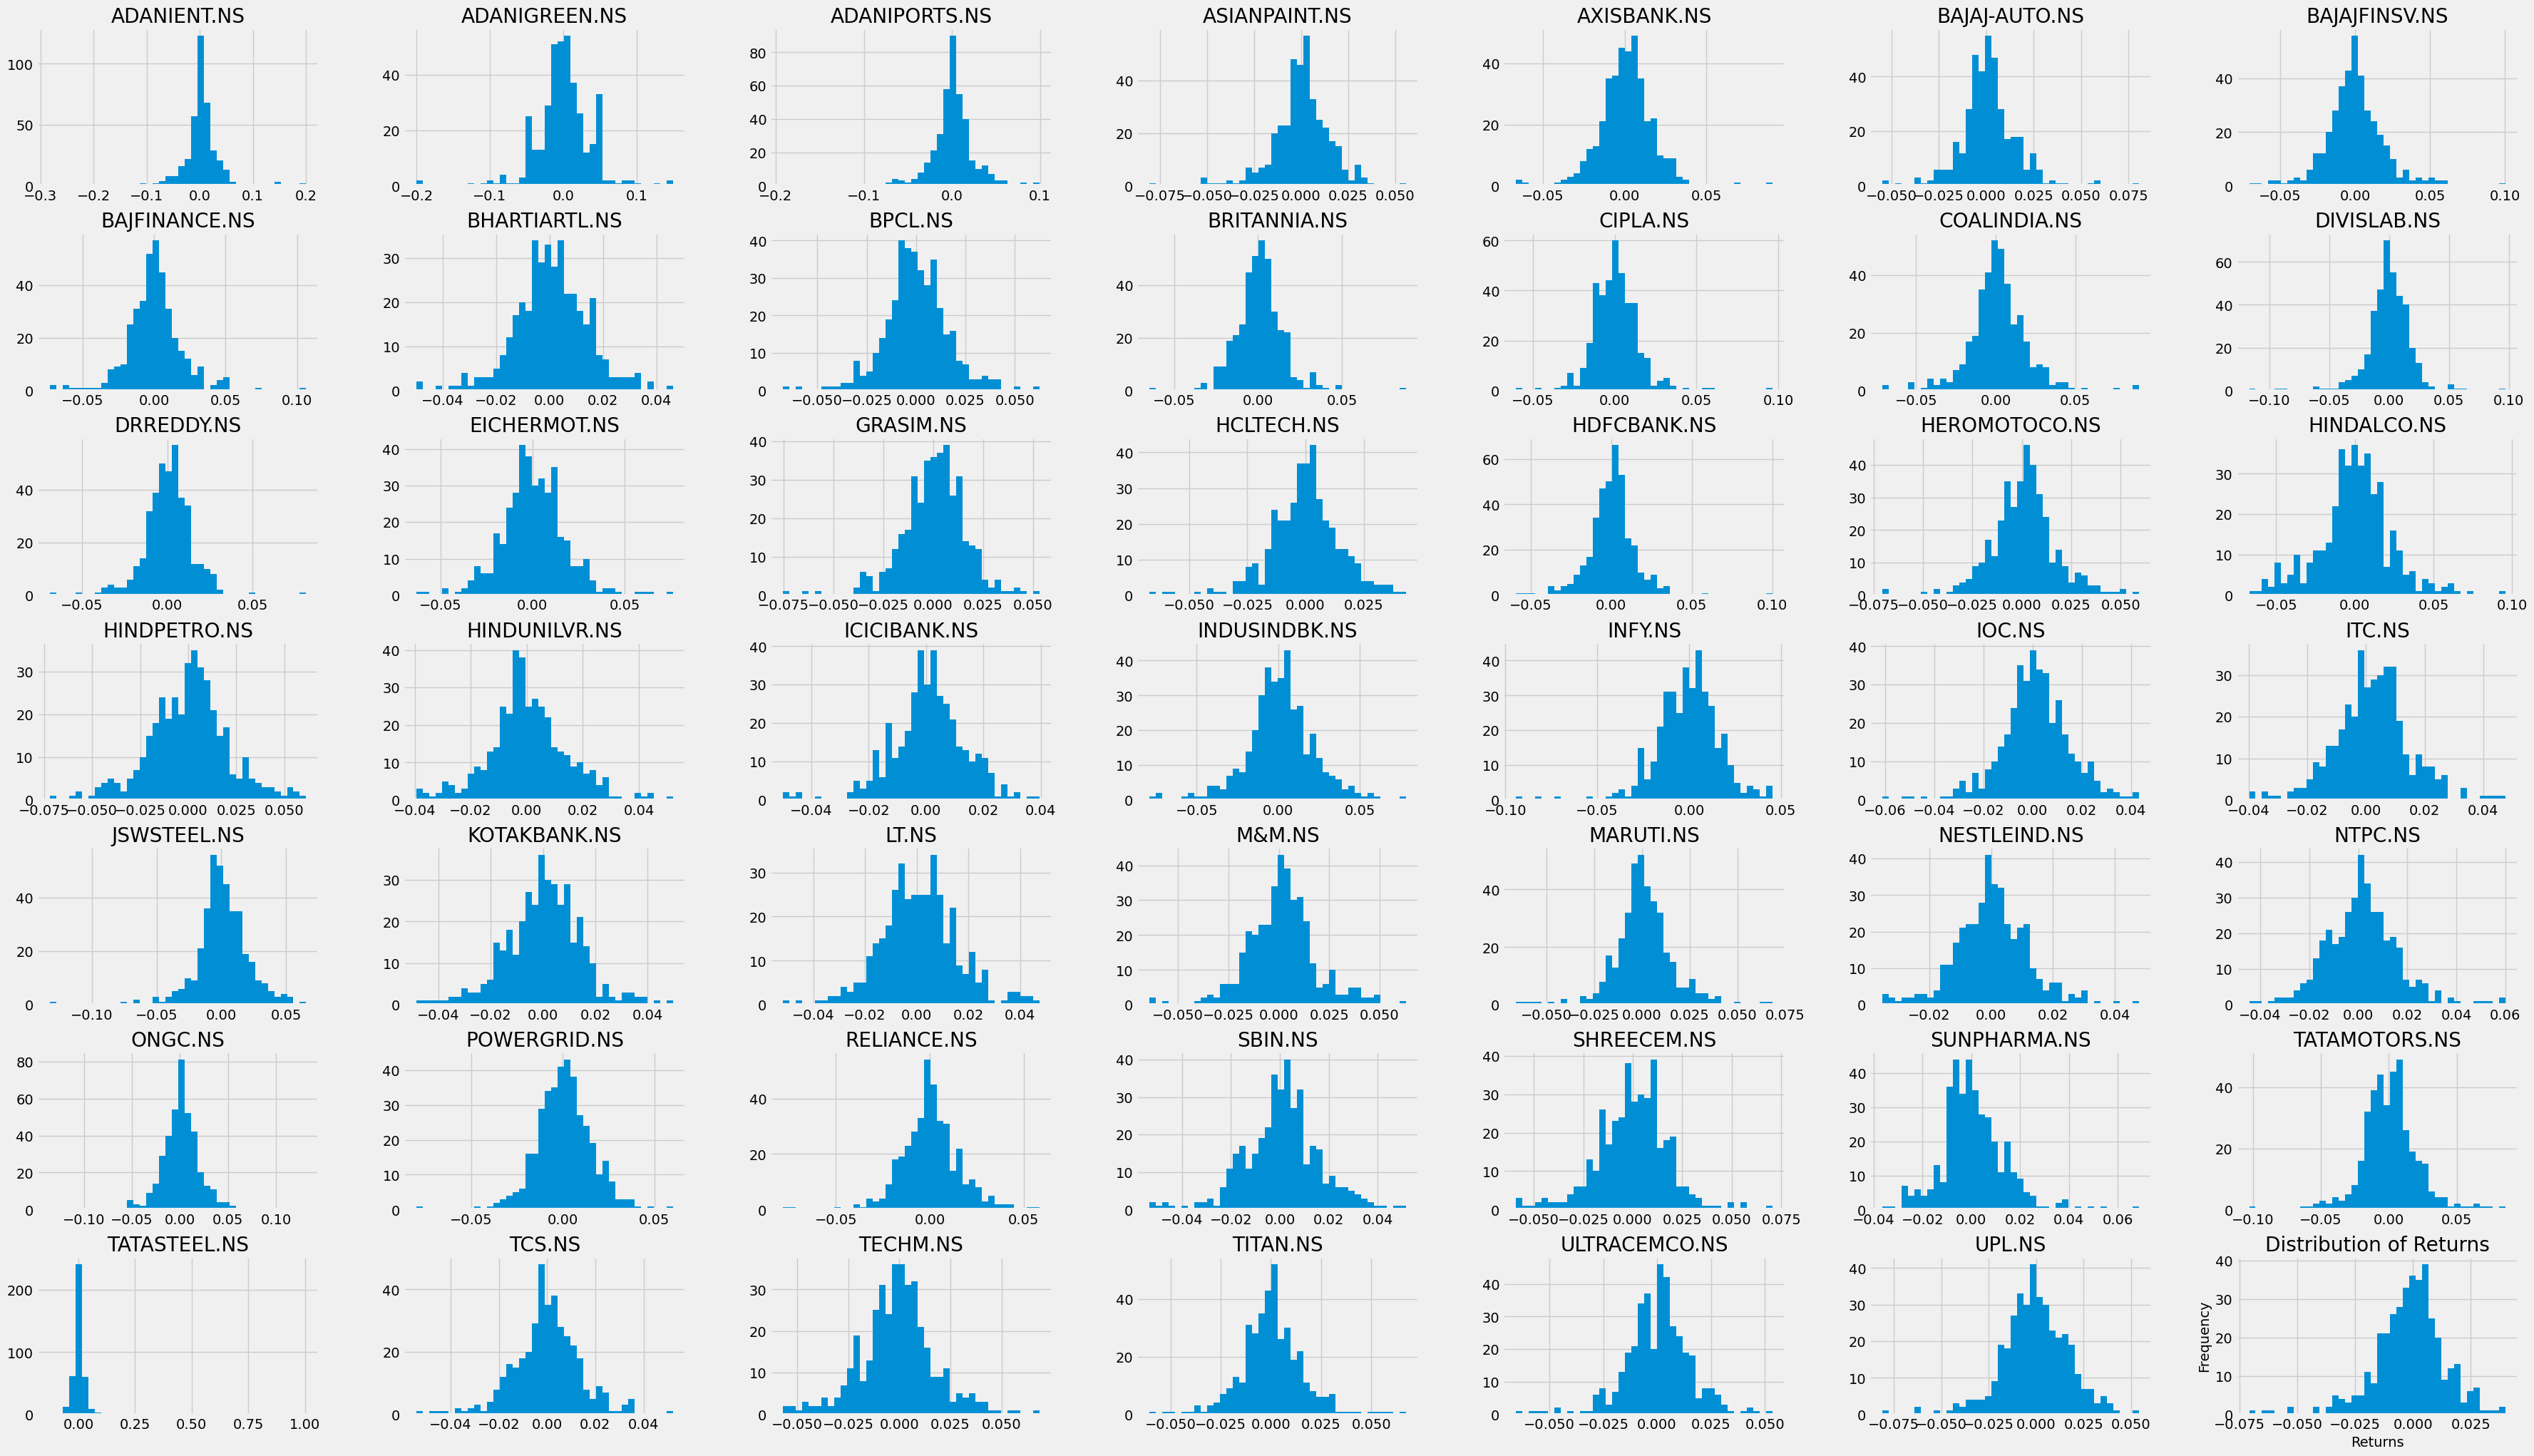

In [ ]:
returns.hist(bins=40, figsize=(40, 24))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Returns')

# Calculate and plot the correlation matrix

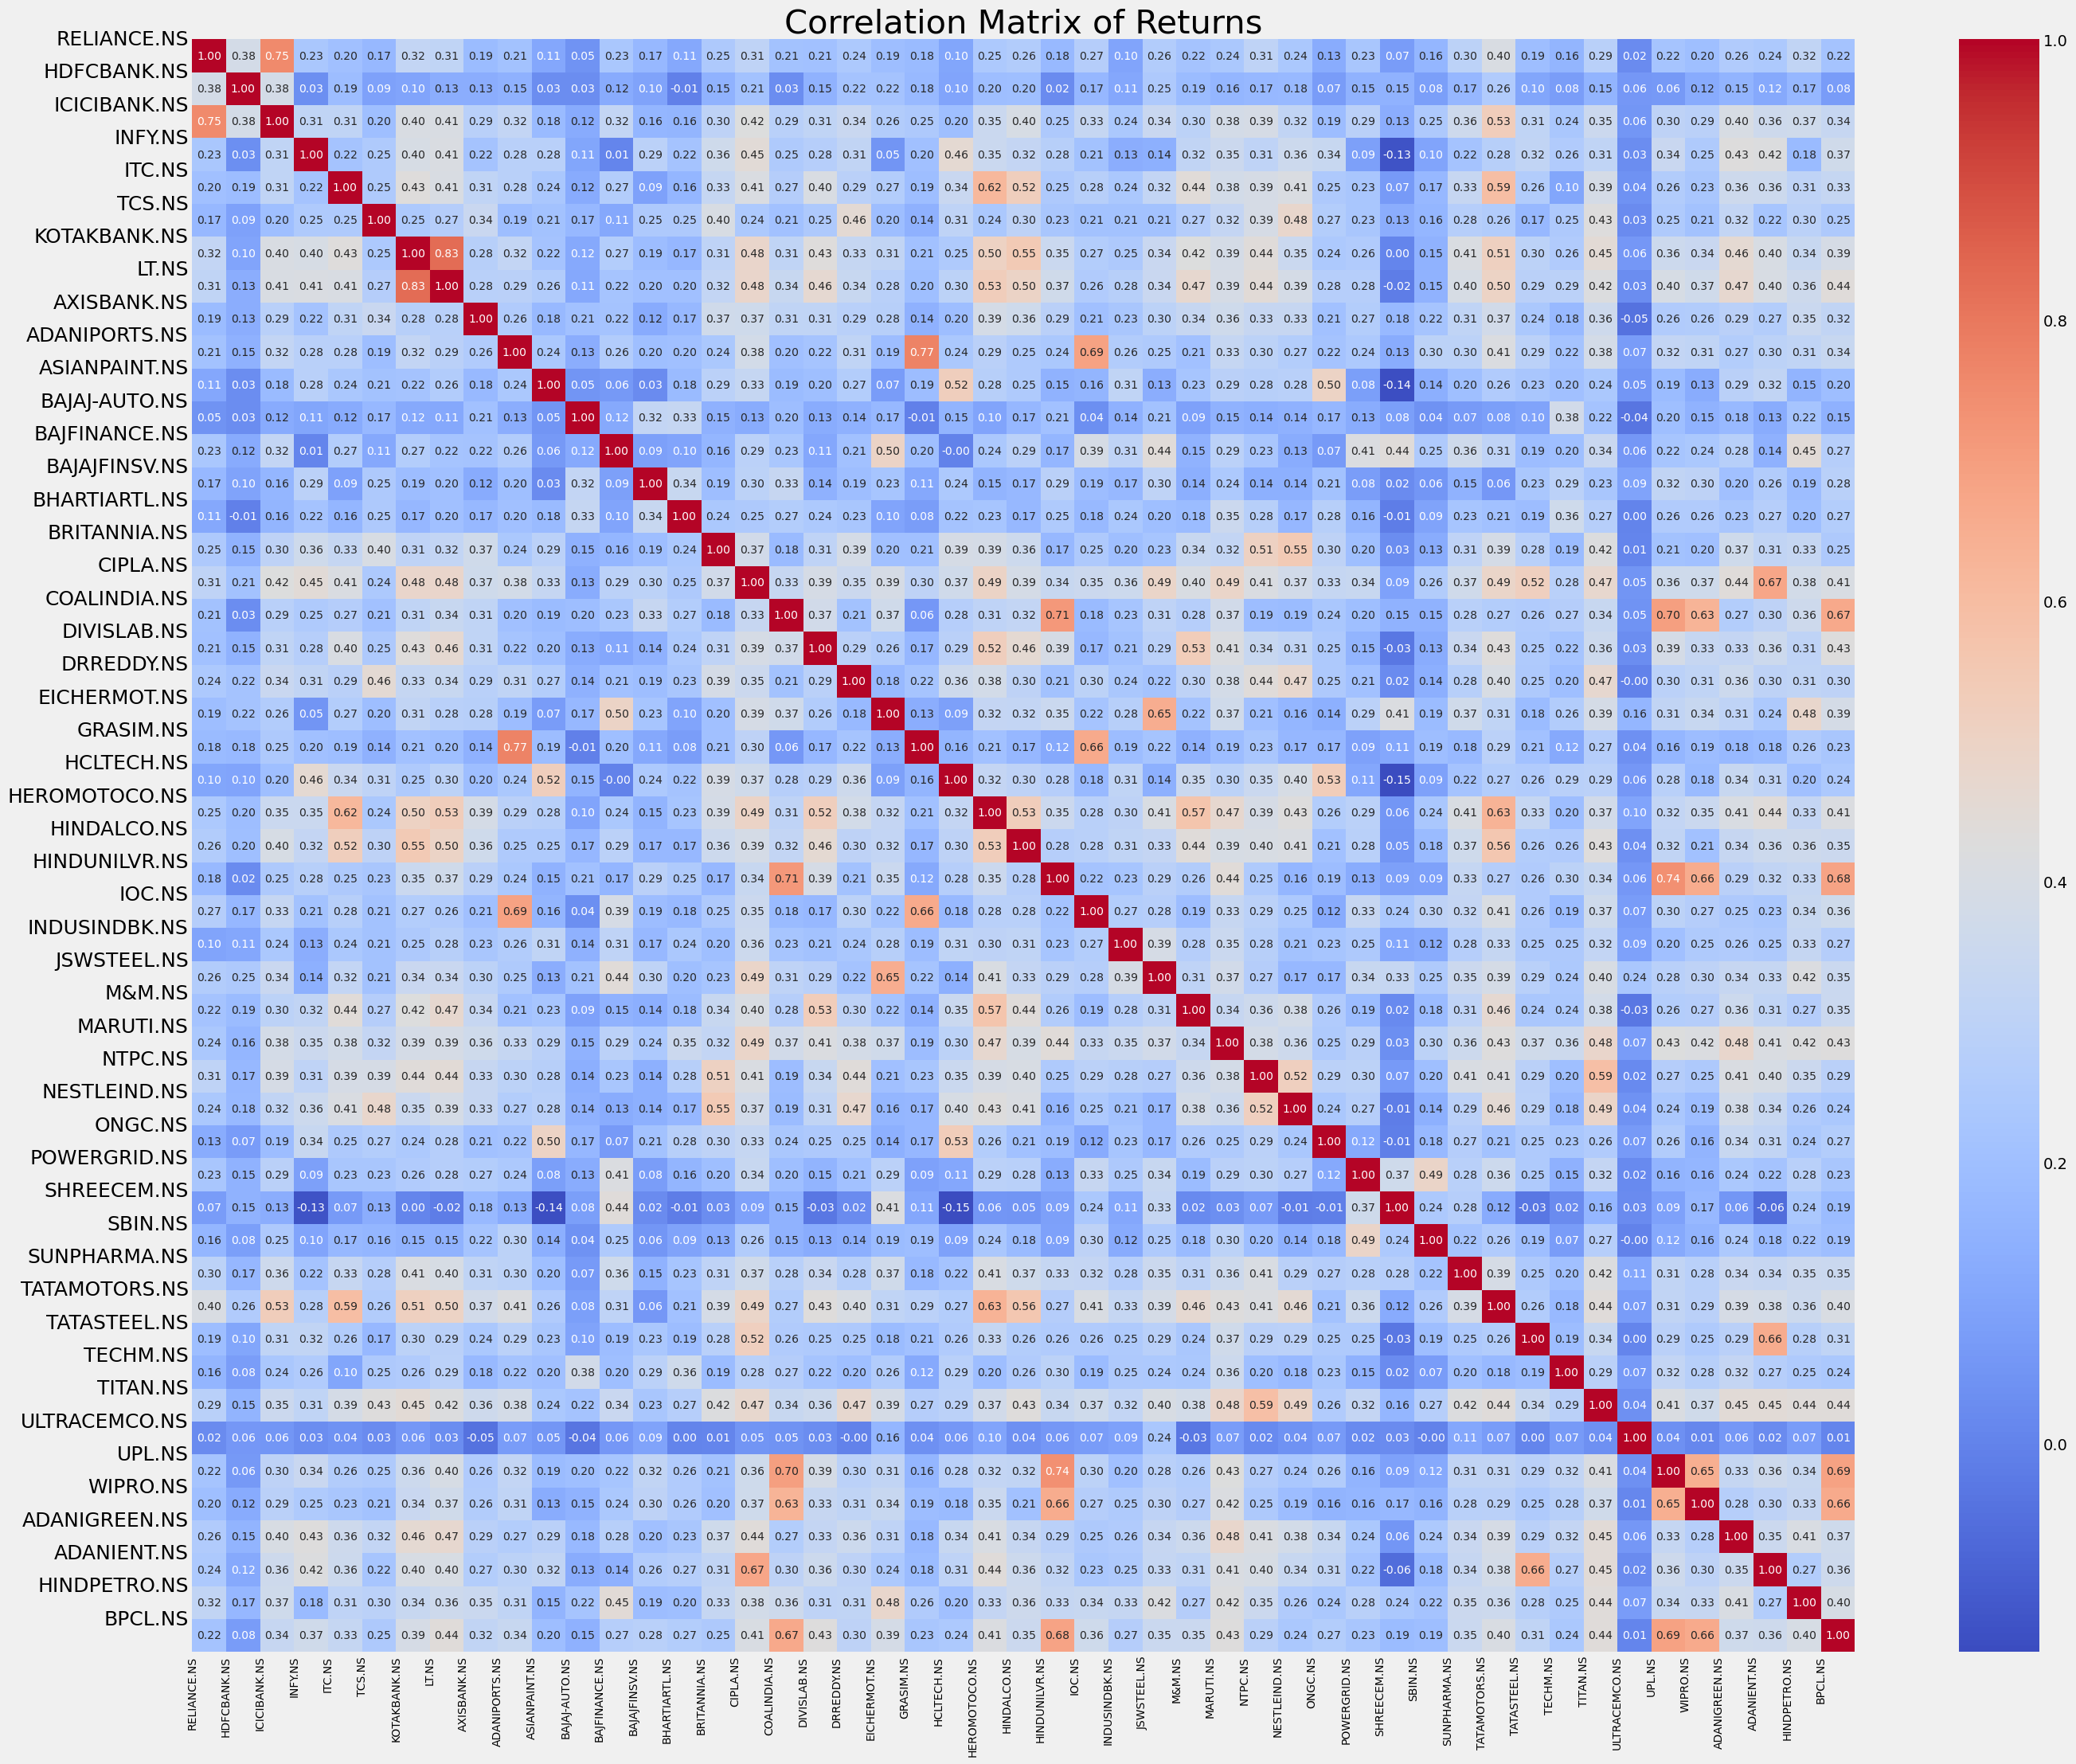

In [ ]:
corr_matrix = returns.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size":10})
plt.xticks(range(len(symbols)), symbols, rotation='vertical', fontsize=10)
plt.yticks(range(len(symbols)), symbols, fontsize=18)
plt.title('Correlation Matrix of Returns', fontsize=30)
plt.show()

# Plotting Adj Close Price

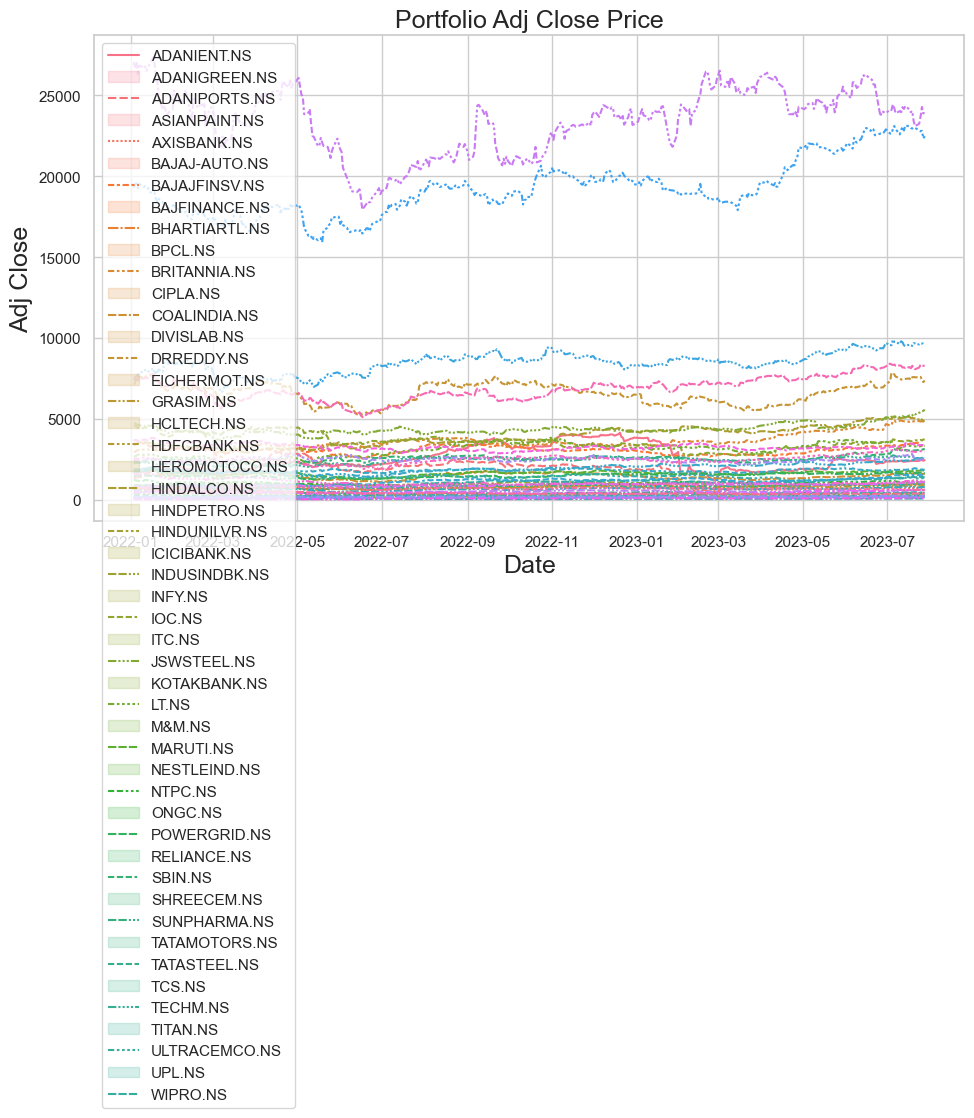

In [ ]:
title = 'Portfolio Adj Close Price'
my_stock =data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=my_stock)
plt.title(title, fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.legend(labels=my_stock.columns, loc="upper left")
plt.tight_layout()
plt.show()

# Annualized covariance matrix

In [ ]:
covariance_matrix=returns.cov() * 252
covariance_matrix

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
ADANIENT.NS,0.407970,0.146157,0.200187,0.035791,0.032929,0.025966,0.062660,0.060367,0.025599,0.034553,...,0.035434,0.021146,0.059185,0.012792,0.030609,0.036868,0.041705,0.037775,0.054876,0.033384
ADANIGREEN.NS,0.146157,0.357481,0.094880,0.004502,0.028676,0.012585,0.018284,0.024113,0.016974,0.021879,...,0.017874,0.009483,0.029972,0.031721,0.008125,0.021212,0.023075,0.017215,0.027057,0.010787
ADANIPORTS.NS,0.200187,0.094880,0.173027,0.030870,0.033047,0.019261,0.051287,0.051585,0.025576,0.033617,...,0.037193,0.020329,0.047600,0.020756,0.027492,0.034888,0.042198,0.036491,0.041443,0.033567
ASIANPAINT.NS,0.035791,0.004502,0.030870,0.057034,0.013238,0.014126,0.028899,0.029711,0.011121,0.016991,...,0.021719,0.012838,0.024067,0.005625,0.017680,0.017531,0.025788,0.024339,0.011762,0.021240
AXISBANK.NS,0.032929,0.028676,0.033047,0.013238,0.064643,0.015165,0.033642,0.031523,0.016950,0.018255,...,0.019129,0.005414,0.031907,0.009551,0.014465,0.017015,0.023202,0.022055,0.021297,0.020136
BAJAJ-AUTO.NS,0.025966,0.012585,0.019261,0.014126,0.015165,0.054803,0.017521,0.019192,0.017216,0.011462,...,0.011544,0.011948,0.032484,0.005294,0.012867,0.014411,0.018866,0.012732,0.018848,0.013930
BAJAJFINSV.NS,0.062660,0.018284,0.051287,0.028899,0.033642,0.017521,0.093223,0.077047,0.018490,0.024529,...,0.025946,0.016331,0.044506,0.016226,0.023720,0.030588,0.035354,0.029839,0.028212,0.028898
BAJFINANCE.NS,0.060367,0.024113,0.051585,0.029711,0.031523,0.019192,0.077047,0.092975,0.018661,0.022311,...,0.025097,0.018601,0.041700,0.007432,0.026205,0.032859,0.035968,0.029577,0.030095,0.032075
BHARTIARTL.NS,0.025599,0.016974,0.025576,0.011121,0.016950,0.017216,0.018490,0.018661,0.046513,0.014064,...,0.014858,0.007838,0.025228,-0.009353,0.012131,0.016407,0.015779,0.013941,0.020311,0.016430
BPCL.NS,0.034553,0.021879,0.033617,0.016991,0.018255,0.011462,0.024529,0.022311,0.014064,0.063583,...,0.021097,0.011251,0.031401,0.015818,0.017566,0.022783,0.016940,0.018337,0.021280,0.020382


# Calculate Portfolio Variance

In [ ]:
port_variance= np.dot(weight, np.dot(covariance_matrix, weight))
print("Portfolio Variance:", port_variance)

Portfolio Variance: 0.021503237567044083


# Calculate Volatility for Portfolio

In [ ]:
port_volatility= np.sqrt(port_variance)
port_volatility

0.14663982258255798

In [ ]:
portfolio_annual_return= np.sum(returns.mean() * weight) * 252
portfolio_annual_return

0.15370571423161156

In [ ]:
percent_var= str(round(port_variance,2)*100) + '%'
percent_vols= str(round(port_volatility,2)*100) + '%'
percent_ret= str(round(portfolio_annual_return,2)*100) + '%'

print('Expected annual return:' +percent_ret)
print('Annual volatility/risk :' +percent_vols)
print('Annual variance :' +percent_var)

Expected annual return:15.0%
Annual volatility/risk :15.0%
Annual variance :2.0%


# calculate the expected returns and annualised sample covariance matrix of asset returns

In [ ]:
mu = expected_returns.mean_historical_return(data)
cov_matrix = risk_models.sample_cov(data)
ef = EfficientFrontier(mu, cov_matrix)

# Optimize for max sharpe

In [ ]:
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 61.7%
Annual volatility: 16.1%
Sharpe Ratio: 3.71


(0.6172845908814286, 0.16086864350287752, 3.712871432714883)

# Discrete allocation of each stock

In [ ]:
latest_prices = data.iloc[-1]
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()

print("Discrete Allocation:")
for stock, shares in allocation.items():
    print(f"{stock}: {shares} shares")

Discrete Allocation:
ITC.NS: 14 shares
M&M.NS: 1 shares
NTPC.NS: 8 shares
TATASTEEL.NS: 2 shares


# Performing Hierarchical Clustering

In [ ]:
num_clusters = 3
hierarchical_model = AgglomerativeClustering(n_clusters=num_clusters)
clusters = hierarchical_model.fit_predict(returns)

for i, symbol in enumerate(symbols):
    print(f"{symbol}: Cluster {clusters[i]}")


RELIANCE.NS: Cluster 2
HDFCBANK.NS: Cluster 2
ICICIBANK.NS: Cluster 0
INFY.NS: Cluster 2
ITC.NS: Cluster 2
TCS.NS: Cluster 2
KOTAKBANK.NS: Cluster 2
LT.NS: Cluster 2
AXISBANK.NS: Cluster 0
ADANIPORTS.NS: Cluster 2
ASIANPAINT.NS: Cluster 0
BAJAJ-AUTO.NS: Cluster 0
BAJFINANCE.NS: Cluster 0
BAJAJFINSV.NS: Cluster 0
BHARTIARTL.NS: Cluster 0
BRITANNIA.NS: Cluster 2
CIPLA.NS: Cluster 0
COALINDIA.NS: Cluster 2
DIVISLAB.NS: Cluster 2
DRREDDY.NS: Cluster 2
EICHERMOT.NS: Cluster 2
GRASIM.NS: Cluster 0
HCLTECH.NS: Cluster 2
HEROMOTOCO.NS: Cluster 0
HINDALCO.NS: Cluster 0
HINDUNILVR.NS: Cluster 2
IOC.NS: Cluster 2
INDUSINDBK.NS: Cluster 0
JSWSTEEL.NS: Cluster 0
M&M.NS: Cluster 2
MARUTI.NS: Cluster 2
NTPC.NS: Cluster 0
NESTLEIND.NS: Cluster 0
ONGC.NS: Cluster 0
POWERGRID.NS: Cluster 0
SHREECEM.NS: Cluster 2
SBIN.NS: Cluster 0
SUNPHARMA.NS: Cluster 2
TATAMOTORS.NS: Cluster 2
TATASTEEL.NS: Cluster 0
TECHM.NS: Cluster 0
TITAN.NS: Cluster 0
ULTRACEMCO.NS: Cluster 0
UPL.NS: Cluster 2
WIPRO.NS: Cluster 2

# Calculating Linkage Matrix

Number of symbols: 49
Number of rows in linkage matrix: 388
[[3.46000000e+02 3.67000000e+02 5.09597942e-02 2.00000000e+00]
 [1.50000000e+02 2.48000000e+02 6.02451125e-02 2.00000000e+00]
 [2.18000000e+02 2.33000000e+02 6.06159901e-02 2.00000000e+00]
 [1.59000000e+02 3.76000000e+02 6.13828479e-02 2.00000000e+00]
 [3.23000000e+02 3.32000000e+02 6.18279342e-02 2.00000000e+00]
 [2.15000000e+02 2.38000000e+02 6.21851191e-02 2.00000000e+00]
 [1.34000000e+02 2.56000000e+02 6.53632743e-02 2.00000000e+00]
 [2.60000000e+01 3.66000000e+02 6.82180614e-02 2.00000000e+00]
 [1.88000000e+02 2.44000000e+02 6.83159206e-02 2.00000000e+00]
 [1.71000000e+02 3.59000000e+02 6.87629864e-02 2.00000000e+00]]


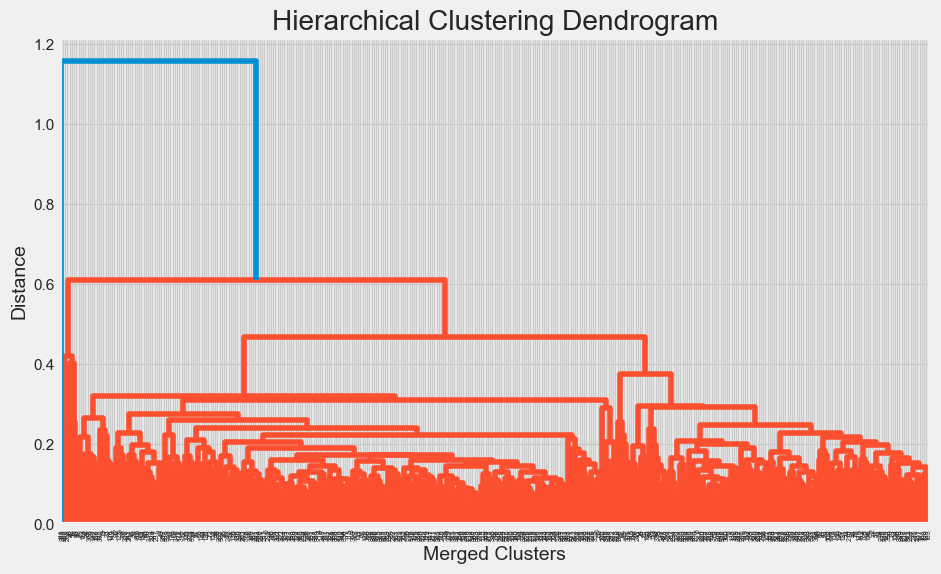

In [ ]:
linkage_matrix = linkage(returns, method='complete')
print("Number of symbols:", len(symbols))
print("Number of rows in linkage matrix:", linkage_matrix.shape[0])

print(linkage_matrix[:10])

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Merged Clusters')
plt.ylabel('Distance')
plt.show()

# Perform clustering of portfolios using K-means and calculating silhouette_score

In [ ]:
kmeans_model = KMeans(n_clusters=num_clusters)
kmeans_clusters = kmeans_model.fit_predict(returns)

silhouette_avg = silhouette_score(returns, kmeans_clusters)
sample_silhouette_values = silhouette_samples(returns, kmeans_clusters)

# Visualising Parallel plot using K-means Clustering

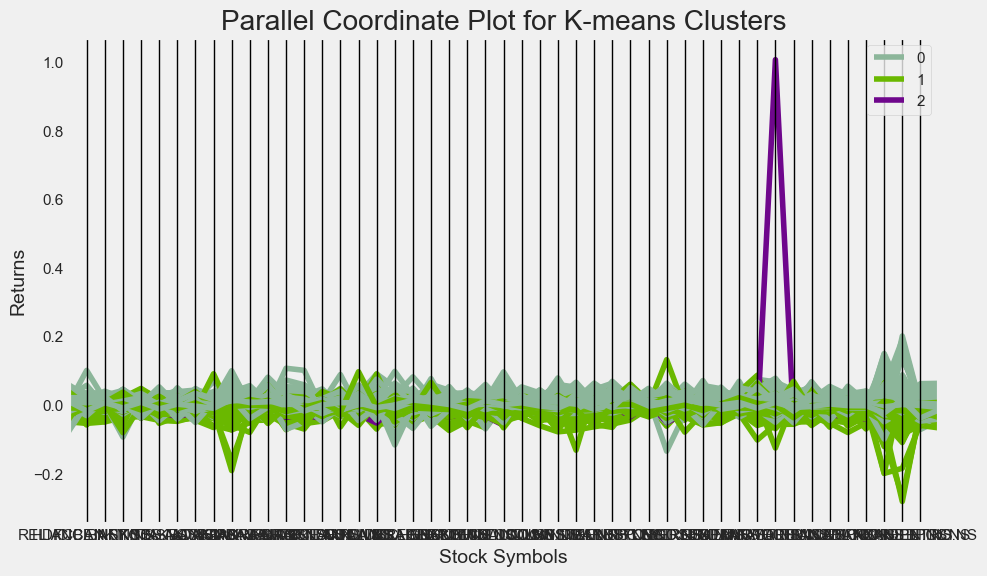

In [ ]:
plt.figure(figsize=(10, 6))
parallel_plot_data = pd.DataFrame(data=returns, columns=symbols)
parallel_plot_data['Cluster'] = kmeans_clusters
sns.set_palette("Set1",n_colors=num_clusters)
pd.plotting.parallel_coordinates(parallel_plot_data, 'Cluster')
plt.title('Parallel Coordinate Plot for K-means Clusters')
plt.xlabel('Stock Symbols')
plt.ylabel('Returns')
plt.show()

# Plotting using silhouette for k-means Clustering

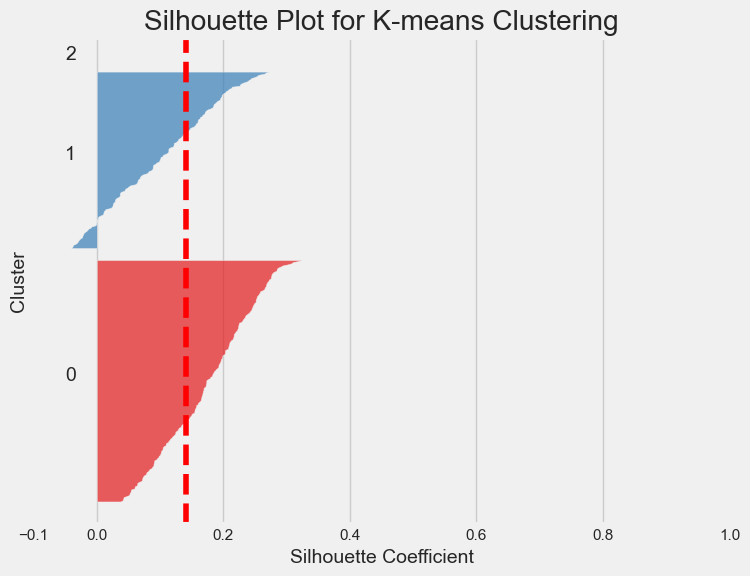

In [ ]:
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=f'C{i}', alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-means Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

# Performing PCA and Visualising

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(returns)

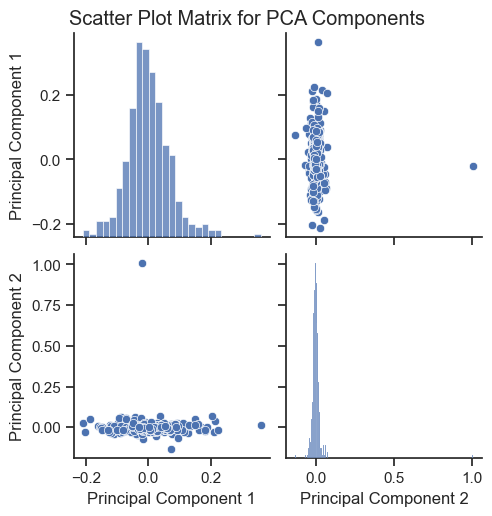

In [ ]:
pca_df = pd.DataFrame(data=pca_components, columns=['Principal Component 1', 'Principal Component 2'])
sns.set(style="ticks")
sns.pairplot(pca_df)
plt.suptitle("Scatter Plot Matrix for PCA Components", y=1.02)
plt.show()

<Figure size 1200x800 with 0 Axes>

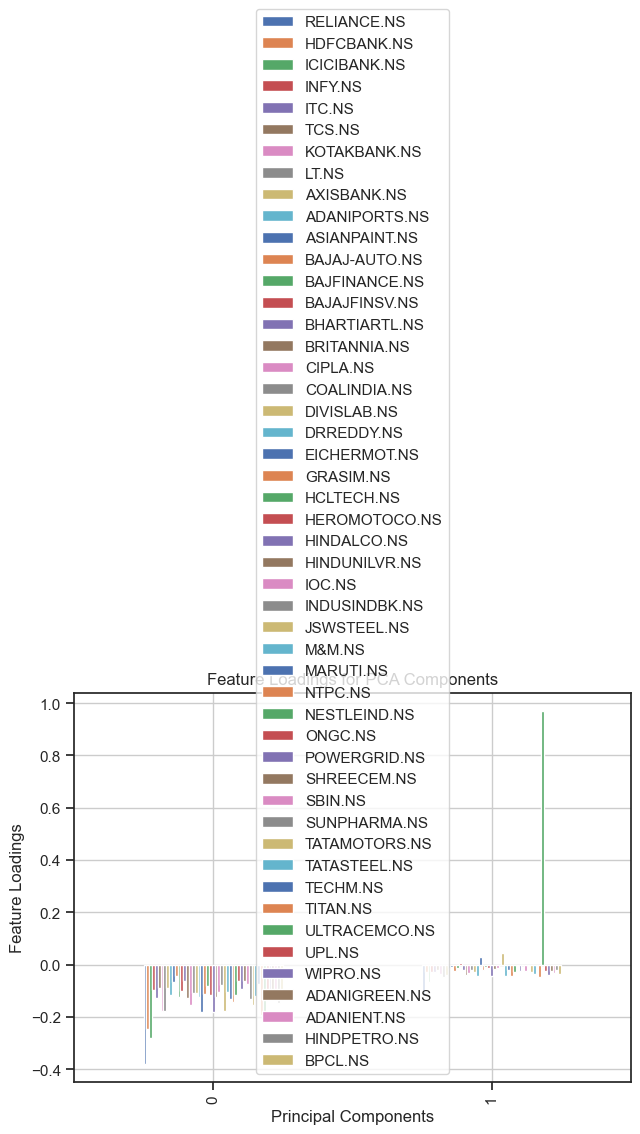

In [ ]:
loadings_df = pd.DataFrame(pca.components_, columns=symbols)
plt.figure(figsize=(12, 8))
loadings_df.plot(kind='bar')
plt.title('Feature Loadings for PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Feature Loadings')
plt.grid(True)
plt.show()